importing liberies

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib 

importing data


In [3]:
Anaemiadata = pd.read_csv("d_output.csv")
Anaemiadata

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.170845,30.945626,25.921971,6.252659,Yes
1,2,F,43.163481,30.306974,26.759843,8.578865,Yes
2,3,F,46.269997,27.315656,26.028556,9.640936,Yes
3,4,F,45.054787,30.469816,24.460797,4.794217,Yes
4,5,M,45.061884,31.218572,24.071714,8.865329,Yes
...,...,...,...,...,...,...,...
495,496,F,45.749211,27.630846,26.865636,13.760084,No
496,497,F,44.929398,30.271085,24.501944,11.588917,No
497,498,F,43.452565,29.784122,26.764283,12.460060,No
498,499,F,43.224231,29.742489,26.866944,12.074058,No


Data describtion

In [4]:
Anaemiadata.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,45.030260,29.392138,25.576149,10.938374
std,144.481833,2.777042,1.585042,1.917043,2.767554
min,1.000000,38.626133,25.023080,19.495306,4.000000
25%,125.750000,43.199936,28.311988,24.877544,9.061067
50%,250.500000,44.906648,29.534431,25.982361,10.018786
75%,375.250000,46.357891,30.582852,26.754657,13.092756
max,500.000000,54.776064,32.526455,29.956341,16.508313


Exploratory data analysis (EDA)

In [5]:
Anaemiadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        500 non-null    int64  
 1   Sex           500 non-null    object 
 2   %Red Pixel    500 non-null    float64
 3   %Green pixel  500 non-null    float64
 4   %Blue pixel   500 non-null    float64
 5   Hb            500 non-null    float64
 6   Anaemic       500 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 27.5+ KB


In [6]:
# checking null values
Anaemiadata.isna().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [7]:
cols_to_rename = {
    "%Red Pixel" : 'red pixel',
    "%Green pixel" : "green pixel",
    "%Blue pixel" : 'blue pixel'
}
Anaemiadata.rename(columns=cols_to_rename , inplace=True)

In [8]:
Anaemiadata.columns = map(str.lower , Anaemiadata.columns)

In [9]:
Anaemiadata.duplicated().sum()

0

Top and bottom 10 records

In [10]:
Anaemiadata.head(10)

,number,sex,red pixel,green pixel,blue pixel,hb,anaemic
0,1,M,43.170845,30.945626,25.921971,6.252659,Yes
1,2,F,43.163481,30.306974,26.759843,8.578865,Yes
2,3,F,46.269997,27.315656,26.028556,9.640936,Yes
3,4,F,45.054787,30.469816,24.460797,4.794217,Yes
4,5,M,45.061884,31.218572,24.071714,8.865329,Yes
5,6,F,42.650694,30.102835,27.364009,9.900000,Yes
6,7,F,44.073986,29.946709,25.992890,8.344133,Yes
7,8,F,41.034469,31.856075,27.238625,9.764485,Yes
8,9,M,45.800995,30.085051,24.230831,9.105038,Yes
9,10,M,40.581274,32.043280,27.256172,4.091686,Yes


In [11]:
Anaemiadata.tail(10)

,number,sex,red pixel,green pixel,blue pixel,hb,anaemic
490,491,F,44.890023,29.126156,25.928096,12.939286,No
491,492,F,45.366383,29.150499,25.742759,12.564716,No
492,493,F,44.440257,28.830038,26.614021,15.506987,No
493,494,M,46.925620,25.979260,26.976566,14.701059,No
494,495,M,45.581028,28.731796,25.668721,14.195731,No
495,496,F,45.749211,27.630846,26.865636,13.760084,No
496,497,F,44.929398,30.271085,24.501944,11.588917,No
497,498,F,43.452565,29.784122,26.764283,12.460060,No
498,499,F,43.224231,29.742489,26.866944,12.074058,No
499,500,F,47.353782,26.554186,25.501462,15.207297,No


In [12]:
Anaemiadata.drop("number" , axis=1 , inplace= True)

In [13]:
Anaemiadata.shape

(500, 6)

In [14]:
Anaemiadata.sex.value_counts()

sex
F     152
M     135
F     119
M      94
Name: count, dtype: int64

In [15]:
Anaemiadata["sex"] = Anaemiadata["sex"].replace(['M' , 'F'] , ['M' , 'F'])

In [16]:
Anaemiadata.anaemic.value_counts()

anaemic
Yes    250
No     250
Name: count, dtype: int64

In [17]:
Anaemiadata.describe().T

,count,mean,std,min,25%,50%,75%,max
red pixel,500.0,45.030260,2.777042,38.626133,43.199936,44.906648,46.357891,54.776064
green pixel,500.0,29.392138,1.585042,25.023080,28.311988,29.534431,30.582852,32.526455
blue pixel,500.0,25.576149,1.917043,19.495306,24.877544,25.982361,26.754657,29.956341
hb,500.0,10.938374,2.767554,4.000000,9.061067,10.018786,13.092756,16.508313


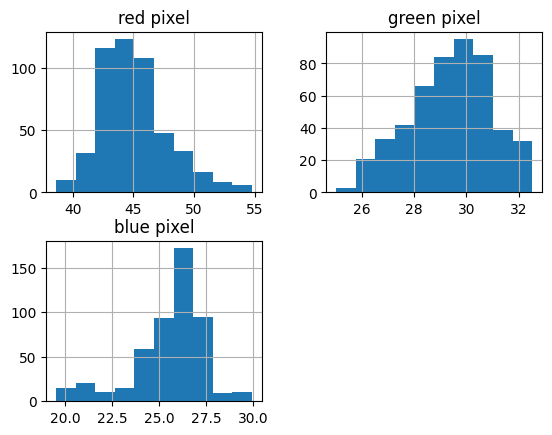

In [18]:
viz = Anaemiadata[["red pixel","green pixel","blue pixel"]]
viz.hist()
plt.show()

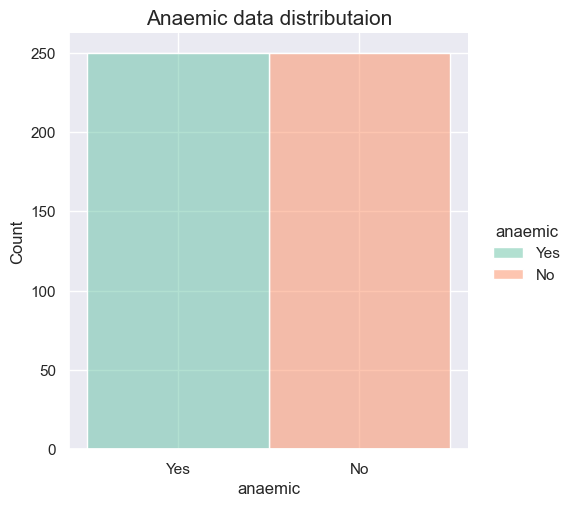

In [19]:
sns.set(style = "darkgrid" , palette = "Set2")
sns.displot(Anaemiadata , x = "anaemic" , hue="anaemic")
plt.title("Anaemic data distributaion" , fontsize = 15)
plt.show()

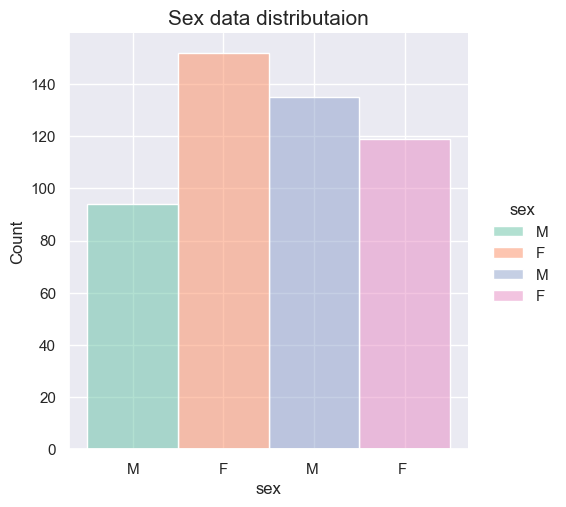

In [20]:
sns.set(style = "darkgrid" , palette = "Set2")
sns.displot(Anaemiadata , x = "sex" , hue="sex")
plt.title("Sex data distributaion" , fontsize = 15)
plt.show()

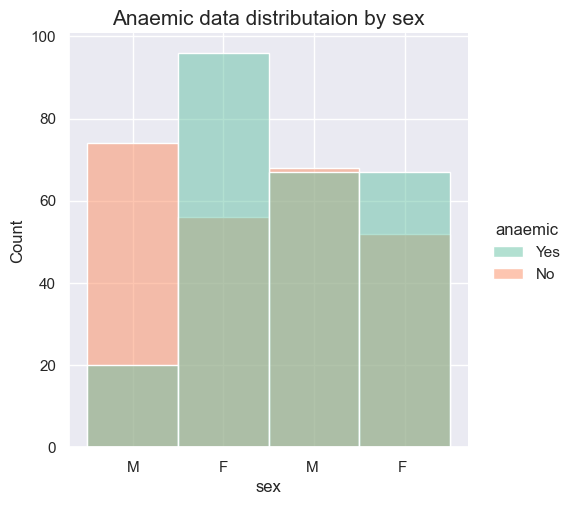

In [24]:
sns.set(style = "darkgrid" , palette = "Set2")
sns.displot(Anaemiadata , x = "sex" , hue="anaemic")
plt.title("Anaemic data distributaion by sex" , fontsize = 15)
plt.show()